# Brain Tumor Detection using YOLOv8 (custom training)

Computer vision is a field of artificial intelligence that focuses on teaching computers to interpret and understand visual information. One popular and powerful technique used in computer vision for object detection is called YOLO, which stands for "You Only Look Once".

YOLO aims to identify and locate objects in an image or video stream in real-time. Unlike traditional methods that rely on complex pipelines and multiple passes, YOLO takes a different approach by treating object detection as a single regression problem.


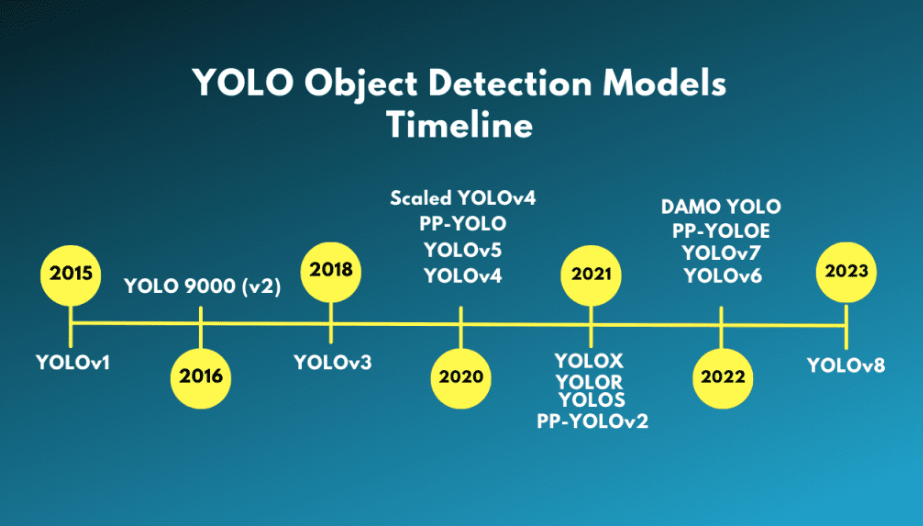

### 2. Description:
We will perform inference on test image and video to check and compare accuracy and many other factors such as speed, no. layers, no. of parameters etc of YOLOn, YOLOs & YOLOm.

### 3. 	Problem Statement:
To detect brain tumor such as:

- Tumor
- No tumor


### 4.	Instructions:
1. Use Google Colab with runtime as T4GPU.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile # This line imports the zipfile module
zip_path = '/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8.zip'
extract_path = '/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

KeyboardInterrupt: 

2. Import all the necessary libraries including  Ultralytics and image visualization

In [ ]:
!pip install ultralytics

In [ ]:
import os,random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
import cv2

In [ ]:
import torch

4. Display the images to check whether dataset has been correctly uploaded or not
- Define the directory containing images
- Set the number of samples to display
- Get the list of all image files in the directory
- Randomly select num_samples images
- Create a 3x3 subplot
- Loop through each randomly selected image and display it

In [ ]:
!pip install Pillow

In [ ]:
import os
from PIL import Image

In [ ]:
def convert_images_to_rgb(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                try:
                    img = Image.open(image_path)
                    img_rgb = img.convert('RGB')
                    img_rgb.save(image_path)
                    print(f"Converted {file} to RGB")
                except Exception as e:
                    print(f"Warning: Could not convert {file} to RGB. Error: {e}")

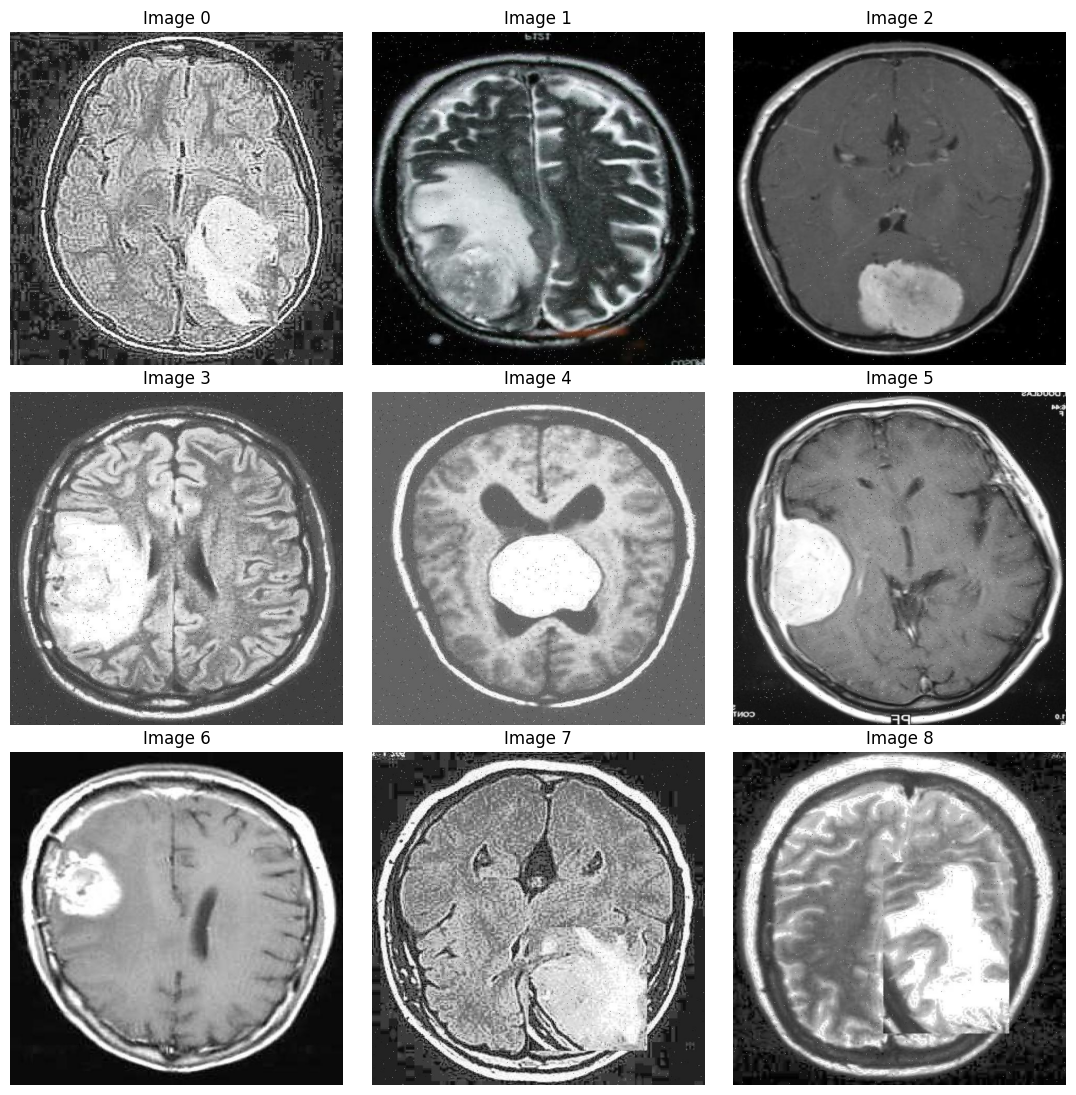

In [ ]:
image_directory = '/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/images'

num_sample = 9

image_files = os.listdir(image_directory)

random_images = random.sample(image_files,num_sample)

fig ,axes = plt.subplots(3,3,figsize=(11,11))

for i in range(num_sample):
  ax = axes[i//3,i%3]
  ax.imshow(mpimg.imread(os.path.join(image_directory,random_images[i])))
  ax.axis('off')
  ax.set_title(f'Image {i}')
  plt.tight_layout()


plt.show()

In [ ]:
# shape of single image

mpimg.imread(os.path.join(image_directory,random_images[6])).shape

(640, 640, 3)

In [ ]:
!pip install --upgrade ultralytics ray==2.32.0

In [ ]:
from ultralytics import YOLO

5. Download YOLOv8 and run Inference on a random image with Traffic signs

In [ ]:
image_dr = os.path.join(image_directory,random_images[0])
image_dr

'/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/images/y574_jpg.rf.8ef03ea7ebe3bf502420cdf6431afd33.jpg'

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/images/y424_jpg.rf.35c1baa4ae87ff74e91ecaf4a0c21537.jpg'

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/images/y424_jpg.rf.35c1baa4ae87ff74e91ecaf4a0c21537.jpg: 640x640 (no detections), 8.5ms
Speed: 4.1ms preprocess, 8.5ms inference, 27.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


### 6. Now train YOLOv8 on Custom data

In [ ]:
import ray
print(ray.__version__)

2.32.0


In [ ]:
yolo_model = YOLO('yolov8n.pt')

In [ ]:
Result_Final_model = yolo_model.train(data="/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/data.yaml",epochs = 20,batch =-1, optimizer = 'auto')

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/labels.cache... 2765 images, 153 backgrounds, 1 corrupt: 100%|██████████| 2766/2766 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/images/y120_jpg.rf.5097f9fddee01d2f0734de97ea5e389c.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/images/y120_jpg.rf.5097f9fddee01d2f0734de97ea5e389c.jpg'
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 13.21G reserved, 1.16G allocated, 0.37G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011043       8.194         2.674         30.64         21.31        (1, 3, 640, 640)                    list
     3011043       16.39         2.821         25.61         22.73        (2, 3, 640, 640)                    list
     3011043       32.78         3.148         27.15         24.25        (4, 3, 640, 640)                    list
     3011043       65.55         3.704         28.62         46.69        (8, 3, 640, 640)                    list
     3011043       131.1         4.807         49.02         84.82       (16, 3, 640, 640)                    list
AutoBatch: WARNING ⚠️ batch=0 outside safe range, using default batch-size 16.
AutoBatch: Using batch-size 16 for CUDA:0 18.85G/14.74G (128%) ✅


train: Scanning /content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/labels.cache... 2765 images, 153 backgrounds, 1 corrupt: 100%|██████████| 2766/2766 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/images/y120_jpg.rf.5097f9fddee01d2f0734de97ea5e389c.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/train/images/y120_jpg.rf.5097f9fddee01d2f0734de97ea5e389c.jpg'
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/valid/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.08G     0.9334      1.919      1.147         30        640: 100%|██████████| 173/173 [01:22<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        184        195      0.844      0.581      0.724      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.06G     0.9707      1.269      1.147         26        640: 100%|██████████| 173/173 [01:17<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        184        195      0.823      0.682      0.803      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.06G      0.937      1.047      1.132         27        640: 100%|██████████| 173/173 [01:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        184        195      0.841      0.733      0.807      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.06G     0.9249     0.9374      1.123         32        640: 100%|██████████| 173/173 [01:16<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        184        195      0.932      0.744      0.849      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.06G     0.8794     0.8837      1.111         29        640: 100%|██████████| 173/173 [01:24<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        184        195      0.905      0.821      0.876      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.06G     0.8336      0.805      1.083         17        640: 100%|██████████| 173/173 [01:42<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        184        195      0.899      0.866      0.905      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.06G     0.8329     0.7914      1.078         32        640: 100%|██████████| 173/173 [01:12<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        184        195      0.897      0.836      0.912      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.06G     0.8018     0.7364      1.072         30        640: 100%|██████████| 173/173 [01:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        184        195       0.97       0.84      0.929       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.06G     0.7738     0.7036      1.056         20        640: 100%|██████████| 173/173 [01:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        184        195       0.94      0.774       0.88      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.06G     0.7443     0.6555      1.039         21        640: 100%|██████████| 173/173 [01:12<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]

                   all        184        195      0.939      0.856      0.928      0.736


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.06G     0.6409     0.5283     0.9919         11        640: 100%|██████████| 173/173 [01:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]

                   all        184        195      0.897      0.846      0.909      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.06G     0.6174     0.4989     0.9684         10        640: 100%|██████████| 173/173 [01:03<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        184        195      0.909      0.882      0.934      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.06G     0.5914      0.468     0.9582         13        640: 100%|██████████| 173/173 [01:03<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]

                   all        184        195      0.905      0.876      0.928       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.06G     0.5745     0.4449     0.9506         13        640: 100%|██████████| 173/173 [01:03<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        184        195      0.929      0.892      0.949      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.06G     0.5554     0.4212     0.9369         14        640: 100%|██████████| 173/173 [01:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        184        195      0.918      0.892      0.929      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.06G     0.5239     0.4137     0.9284         12        640: 100%|██████████| 173/173 [01:05<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        184        195      0.929      0.875      0.946       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.06G     0.5166     0.3861     0.9189         12        640: 100%|██████████| 173/173 [01:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        184        195      0.932      0.908      0.942      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.06G     0.4975     0.3676     0.9046         13        640: 100%|██████████| 173/173 [01:03<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        184        195      0.912      0.944      0.957      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.06G     0.4736     0.3463     0.9021         11        640: 100%|██████████| 173/173 [01:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        184        195      0.931      0.913      0.963       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.06G     0.4564     0.3227     0.8905         13        640: 100%|██████████| 173/173 [01:05<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        184        195      0.916      0.918      0.958      0.789



20 epochs completed in 0.427 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]


                   all        184        195      0.932      0.913      0.963      0.791
Speed: 0.4ms preprocess, 2.9ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train4


Do all the neccesary steps to check inference and check accuracy.

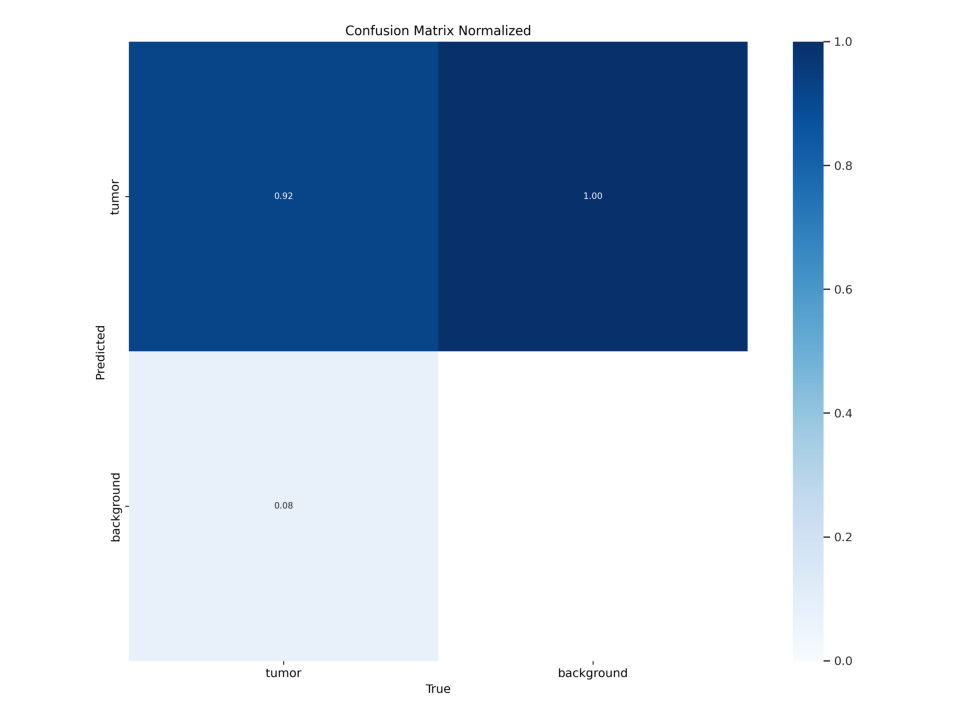

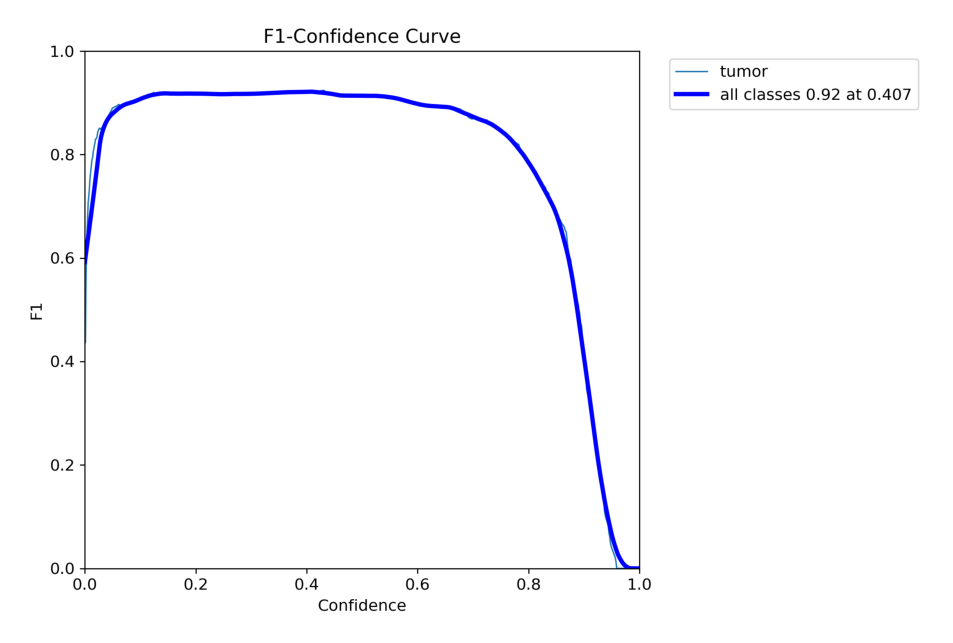

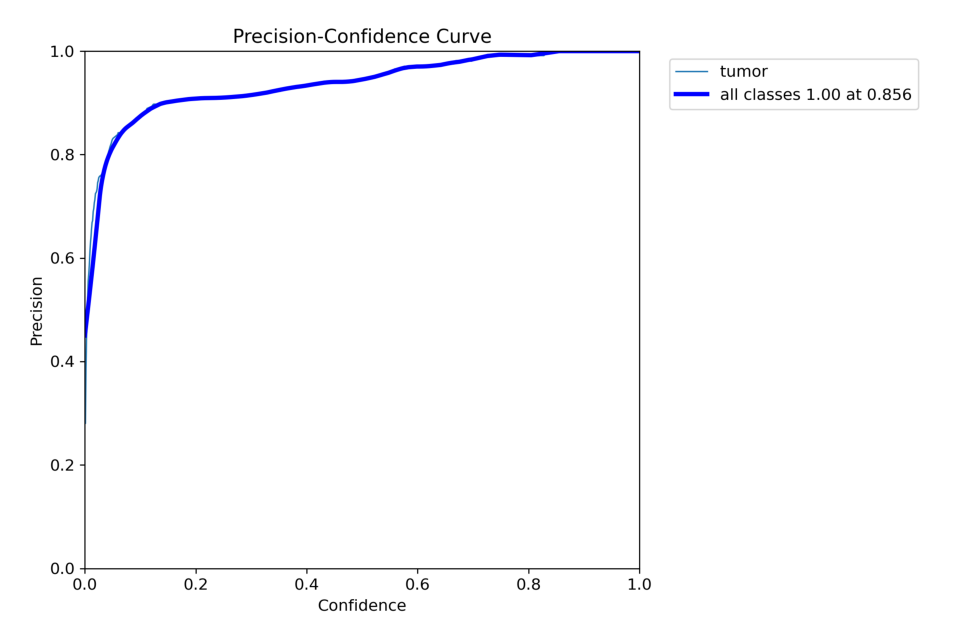

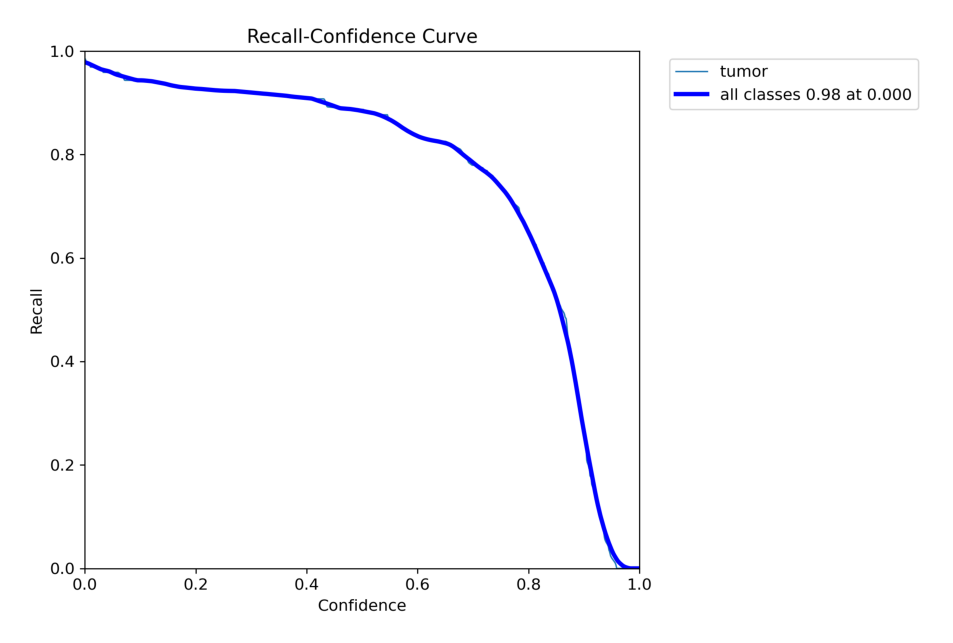

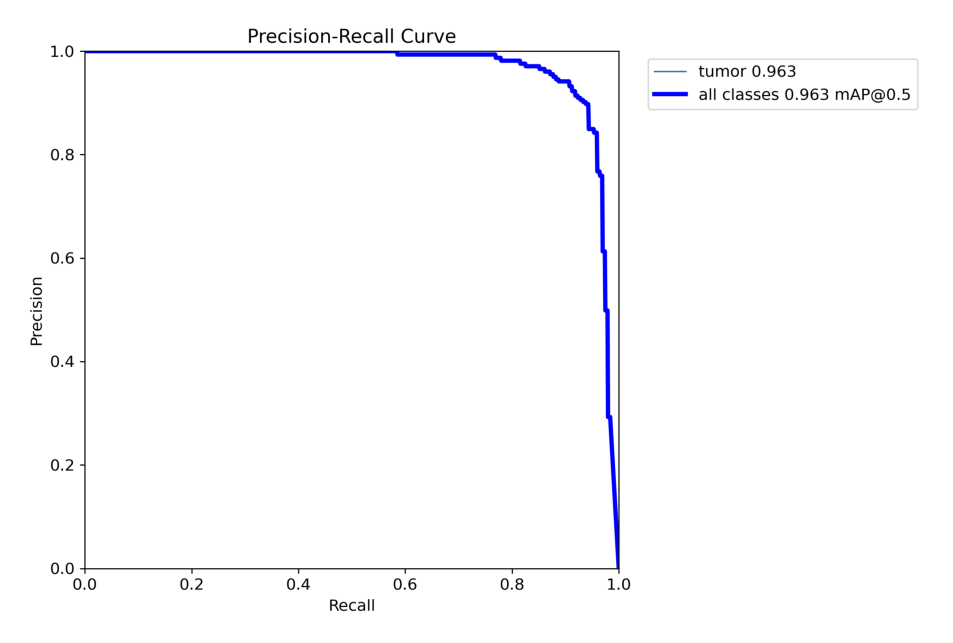

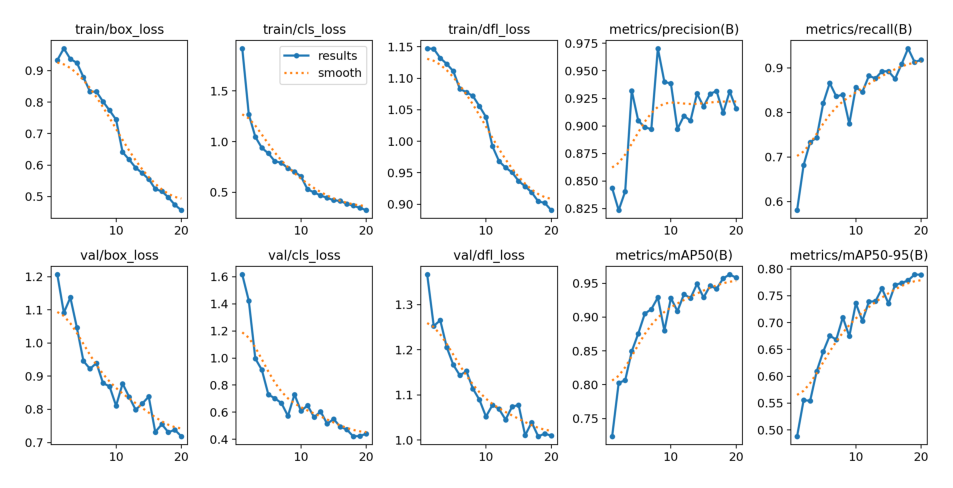

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = './runs/detect/train4'

# Display the images
display_images(post_training_files_path, image_files)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train4/results.csv')
Result_Final_model.tail(10)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
10     11   913.476         0.64092         0.52825         0.99186   
11     12   980.968         0.61740         0.49886         0.96843   
12     13  1048.010         0.59140         0.46797         0.95824   
13     14  1116.100         0.57453         0.44492         0.95061   
14     15  1181.860         0.55538         0.42123         0.93690   
15     16  1251.440         0.52392         0.41372         0.92838   
16     17  1328.110         0.51662         0.38610         0.91891   
17     18  1396.400         0.49750         0.36764         0.90463   
18     19  1467.160         0.47358         0.34634         0.90214   
19     20  1535.610         0.45643         0.32275         0.89051   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
10               0.89718            0.84615           0.90863   
11               0.90917            0.88205           0.93374   
12               0.90471            0.87635           0.92801   
13               0.92937            0.89231           0.94896   
14               0.91756            0.89231           0.92895   
15               0.92922            0.87517           0.94623   
16               0.93161            0.90816           0.94188   
17               0.91171            0.94359           0.95725   
18               0.93132            0.91282           0.96297   
19               0.91563            0.91795           0.95826   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
10              0.70293       0.87758       0.64986       1.07774  0.001010   
11              0.73910       0.83756       0.56247       1.06880  0.000911   
12              0.73960       0.79863       0.60483       1.04521  0.000812   
13              0.76353       0.81707       0.51360       1.07383  0.000713   
14              0.73556       0.83831       0.54951       1.07764  0.000614   
15              0.77004       0.73150       0.49234       1.01041  0.000515   
16              0.77378       0.75507       0.47168       1.03920  0.000416   
17              0.77849       0.73101       0.42132       1.00822  0.000317   
18              0.78955       0.73806       0.42393       1.01414  0.000218   
19              0.78916       0.71855       0.44025       1.00964  0.000119   

      lr/pg1    lr/pg2  
10  0.001010  0.001010  
11  0.000911  0.000911  
12  0.000812  0.000812  
13  0.000713  0.000713  
14  0.000614  0.000614  
15  0.000515  0.000515  
16  0.000416  0.000416  
17  0.000317  0.000317  
18  0.000218  0.000218  
19  0.000119  0.000119

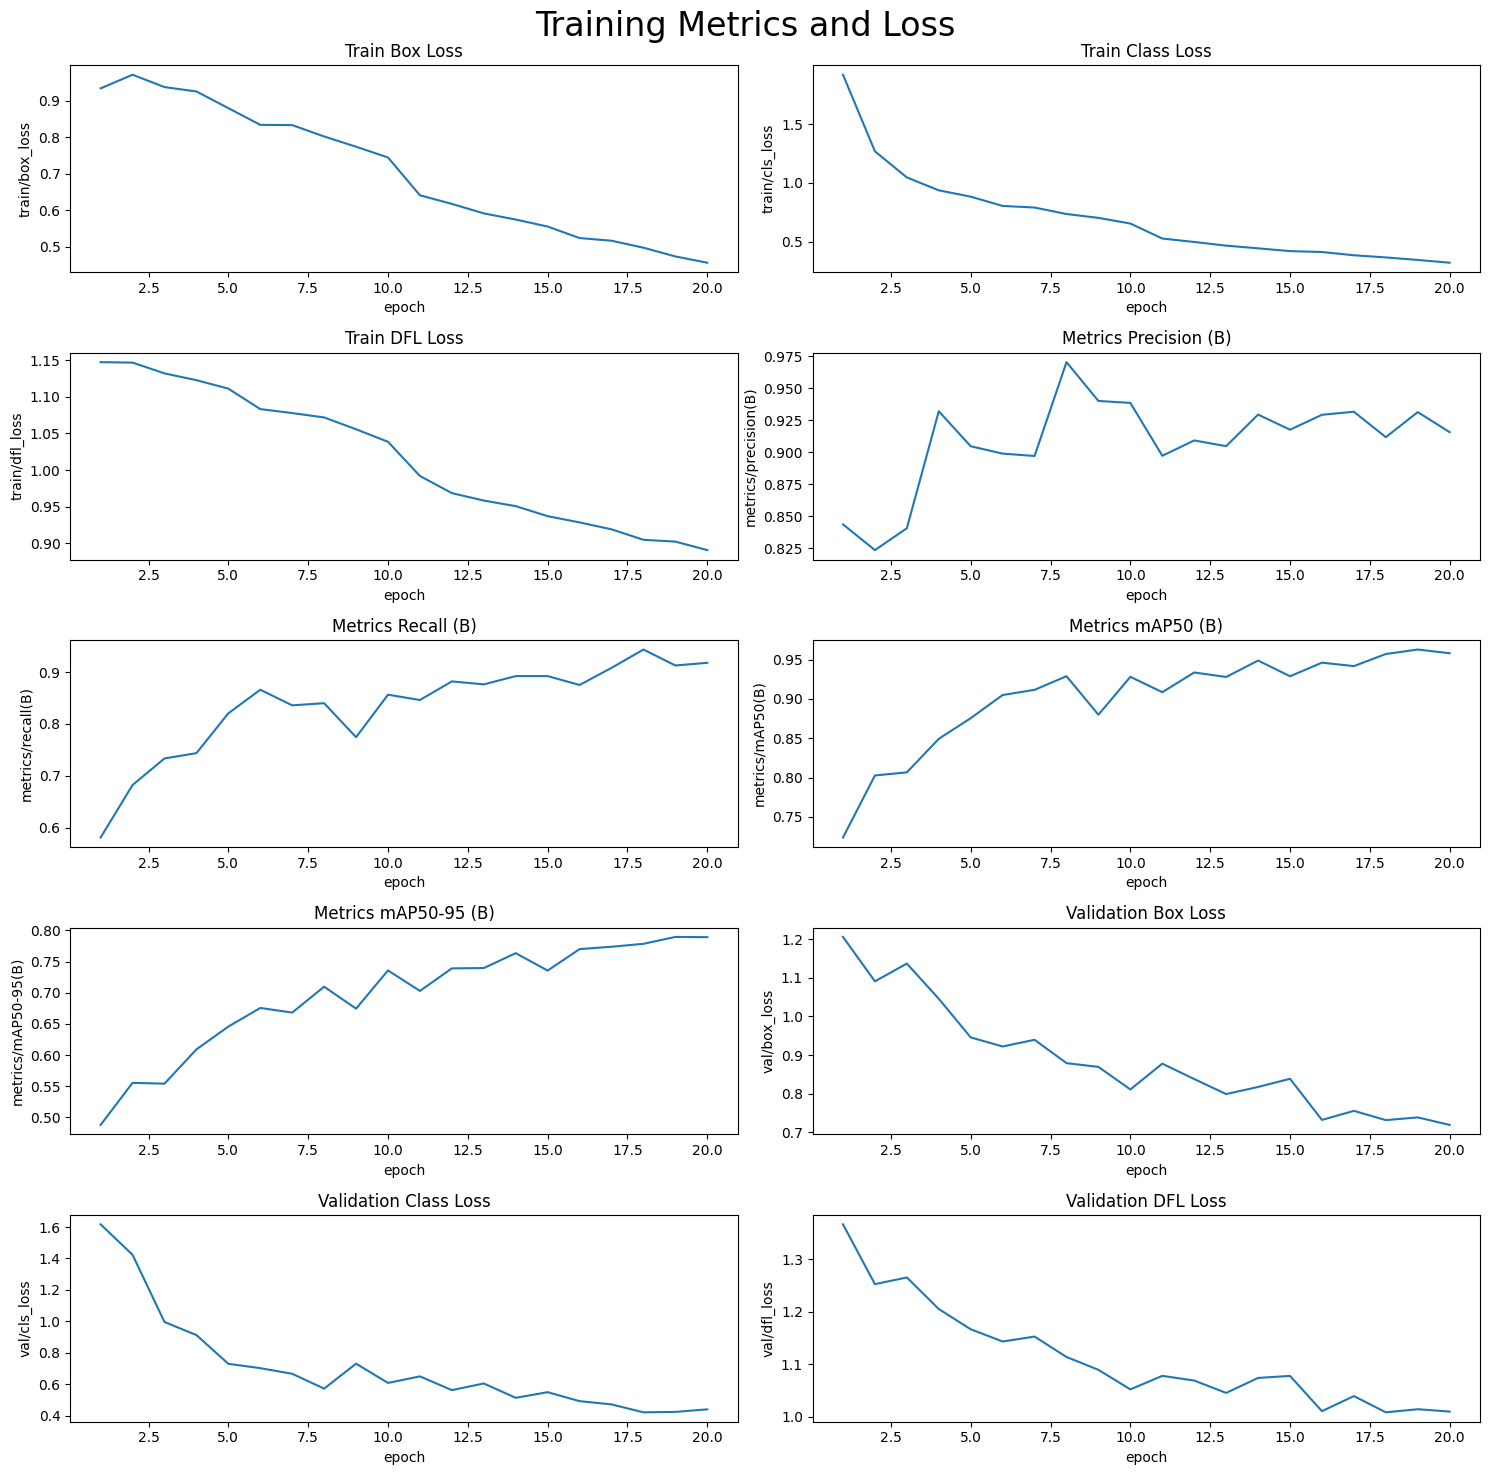

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train4/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8/valid/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


                   all        184        195      0.932      0.913      0.963       0.79
Speed: 3.8ms preprocess, 5.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
precision(B):  0.9317240022993276
metrics/recall(B):  0.9128205128205128
metrics/mAP50(B):  0.9629970245099703
metrics/mAP50-95(B):  0.7898479720672428



0: 640x640 1 tumor, 9.7ms
Speed: 4.7ms preprocess, 9.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tumor, 18.7ms
Speed: 7.2ms preprocess, 18.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tumor, 7.5ms
Speed: 4.2ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tumor, 7.5ms
Speed: 2.9ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tumor, 7.6ms
Speed: 2.8ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 tumors, 7.7ms
Speed: 2.6ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tumor, 7.5ms
Speed: 2.8ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tumor, 8.1ms
Speed: 3.0ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1

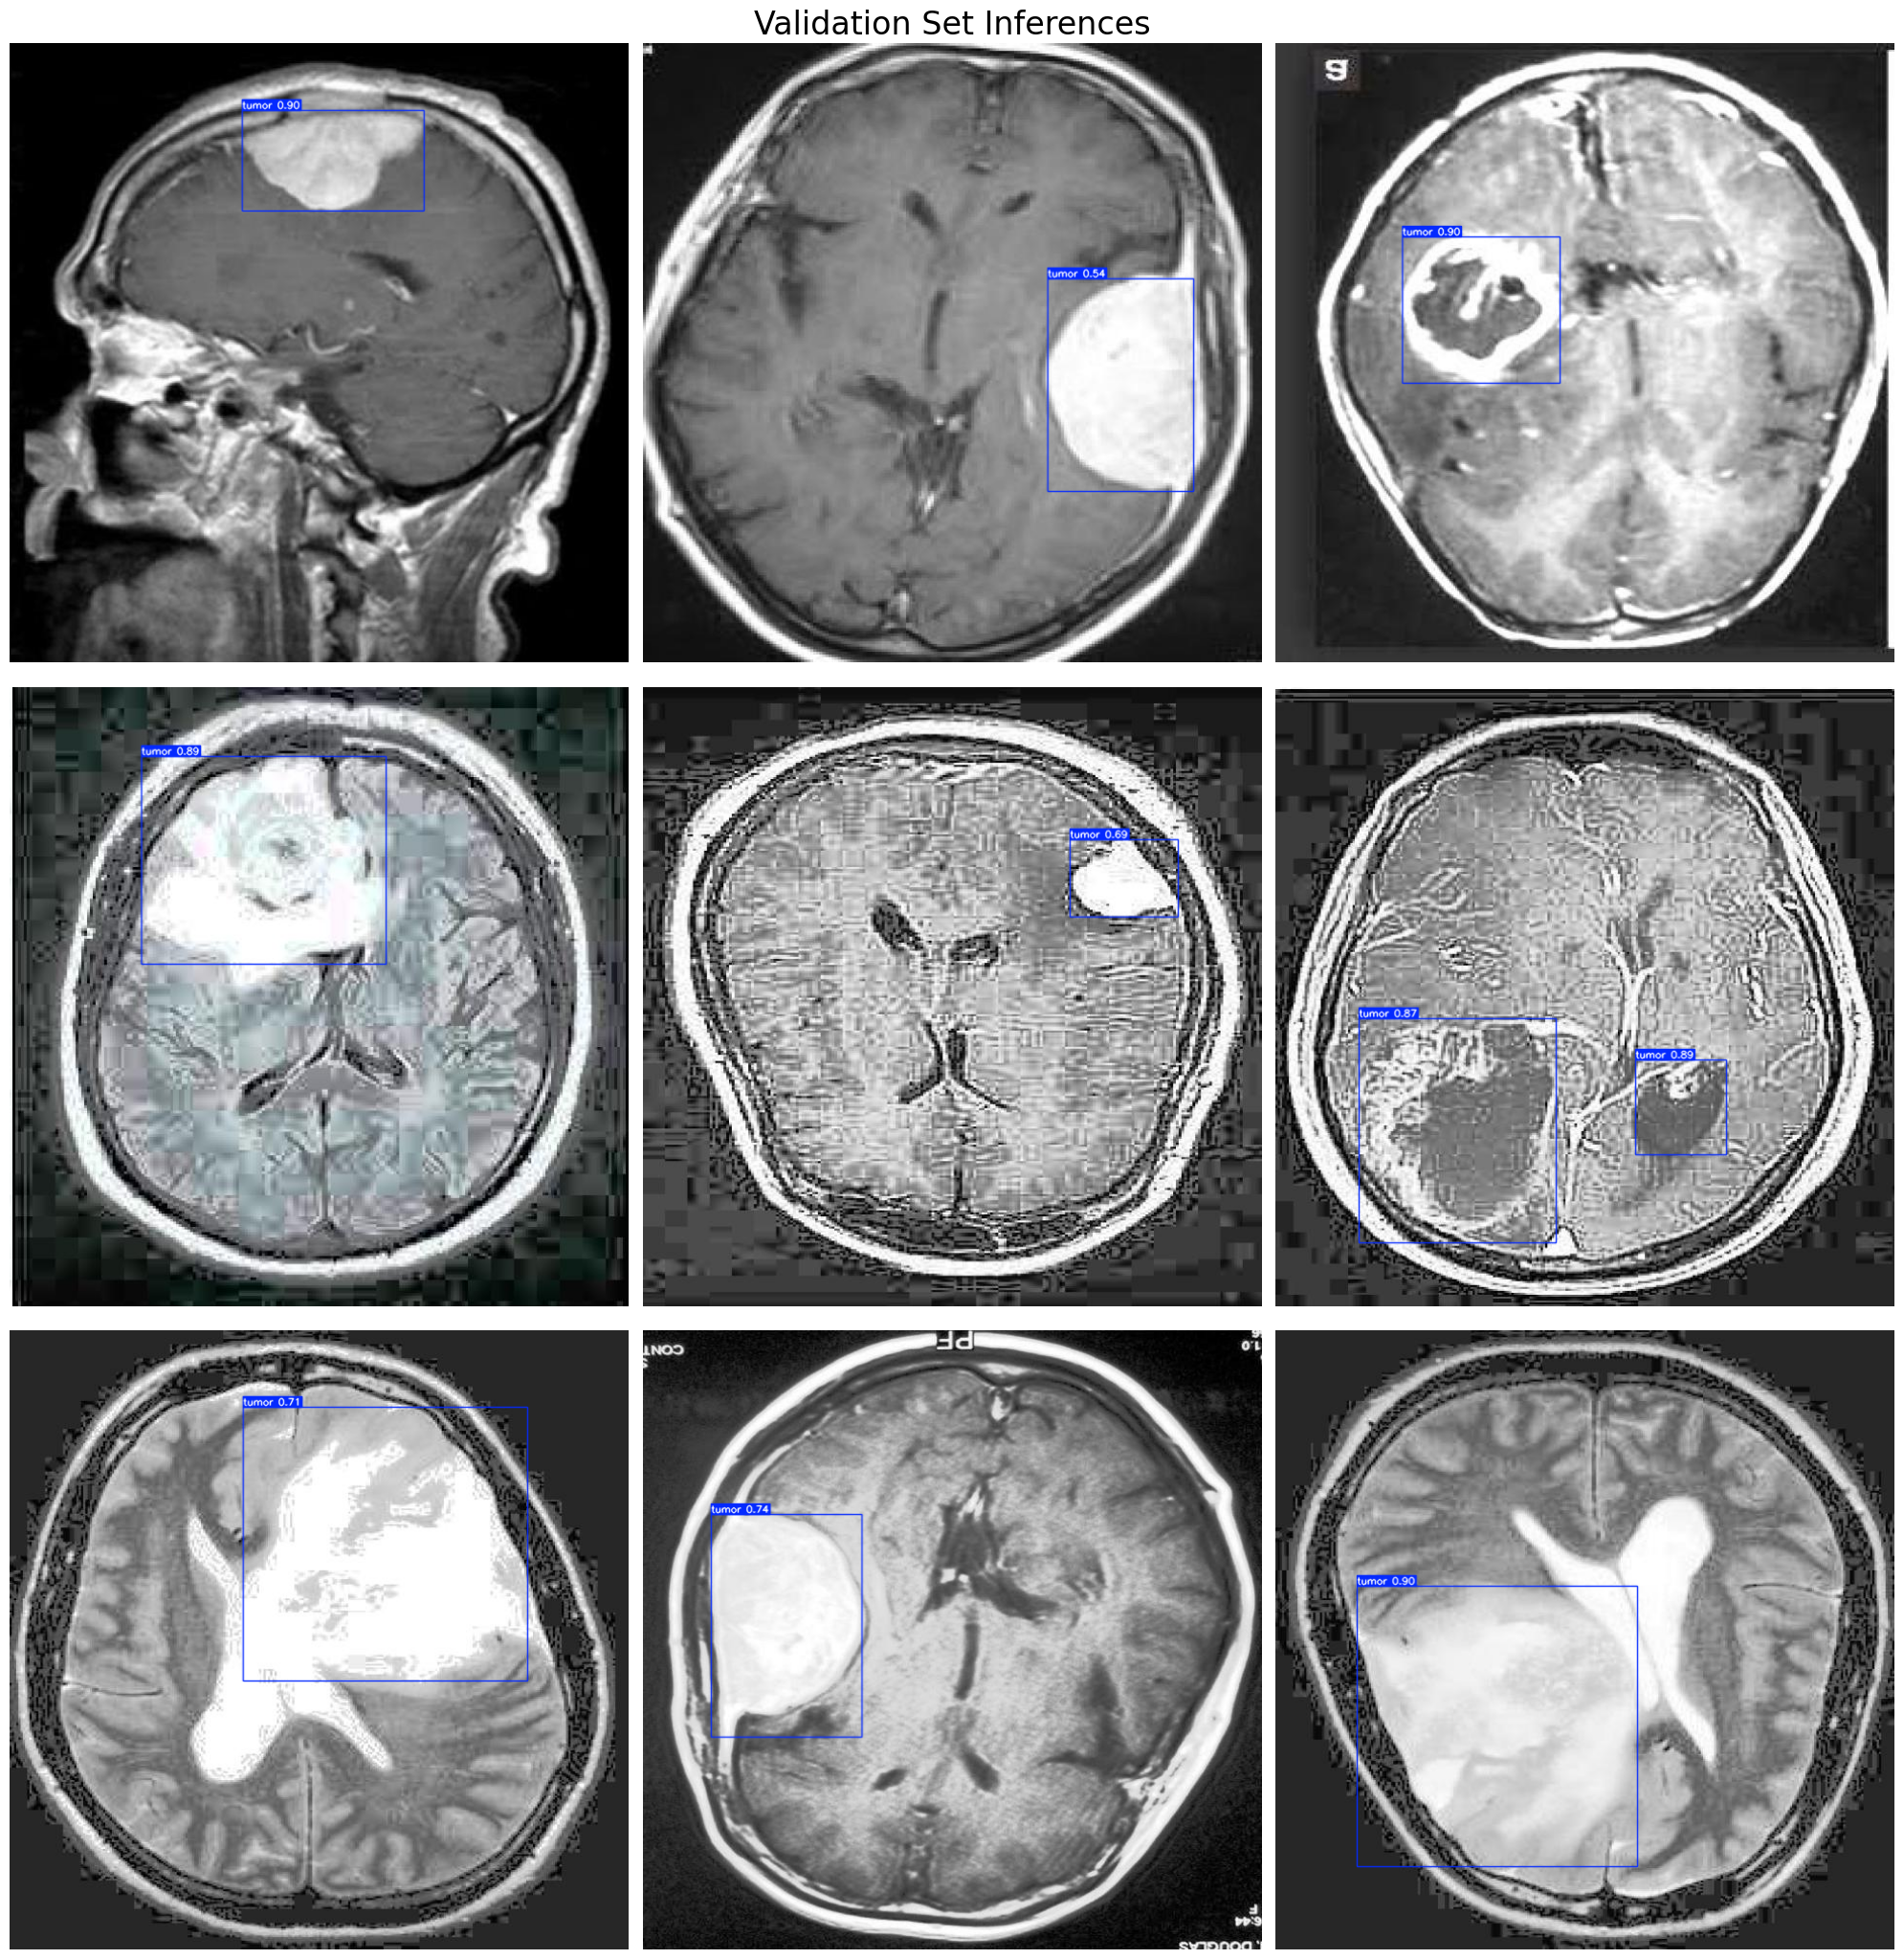

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/drive/MyDrive/Roboflow_Brain_Tumor/brain tumor.v1i.yolov8'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import joblib

In [ ]:
joblib.dump(Result_Final_model,'Result_Final_model.sav')

['Result_Final_model.sav']